In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
import os


In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"

X_train = torch.from_numpy(np.load("/kaggle/input/solvrocompetition/X_train.npy")).to(torch.float)#.to(device)
X_test = torch.from_numpy(np.load("/kaggle/input/solvrocompetition/X_test.npy")).to(torch.float)#.to(device)
X_val = torch.from_numpy(np.load("/kaggle/input/solvrocompetition/X_val.npy")).to(torch.float)#.to(device)

y_train = torch.from_numpy(np.load("/kaggle/input/solvrocompetition/y_train.npy")).to(torch.float)#.to(device)
y_val = torch.from_numpy(np.load("/kaggle/input/solvrocompetition/y_val.npy")).to(torch.float)#.to(device)

In [37]:
y_train.shape, X_train.shape

(torch.Size([151166, 26]), torch.Size([151166, 28, 28]))

In [38]:
X_train[0].shape, X_val[0].shape, y_train[0].shape, y_val[0].shape

(torch.Size([28, 28]),
 torch.Size([28, 28]),
 torch.Size([26]),
 torch.Size([26]))

In [39]:
y_train[0], y_train[0].nonzero(), y_val[0].shape, X_val.shape

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0.]),
 tensor([[20]]),
 torch.Size([26]),
 torch.Size([37792, 28, 28]))

In [40]:
y_train_labels = torch.argmax(y_train, dim=1).squeeze()
y_val_labels = torch.argmax(y_val, dim=1).squeeze()
# Print the converted tensor
# print(len(y_train_labels))
# print(len(y_train))
# print(len(y_val))
# print(len(y_val_labels))
print(y_train.shape)
print(y_train_labels.shape)
print(y_val.shape)
print(y_val_labels.shape)


torch.Size([151166, 26])
torch.Size([151166])
torch.Size([37792, 26])
torch.Size([37792])


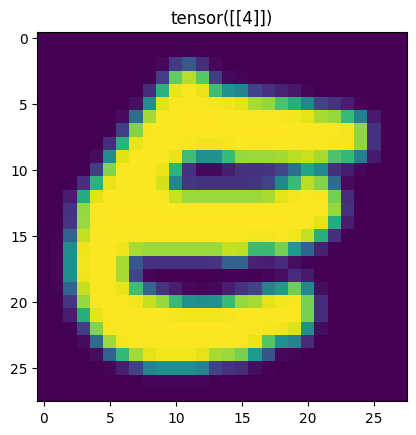

In [41]:
random_index = torch.randint(0, len(X_train), size=[1]).item()
face1 = X_train[random_index].to("cpu").reshape(28,28)
plt.imshow(face1)
plt.title(y_train[random_index].nonzero())
plt.show()

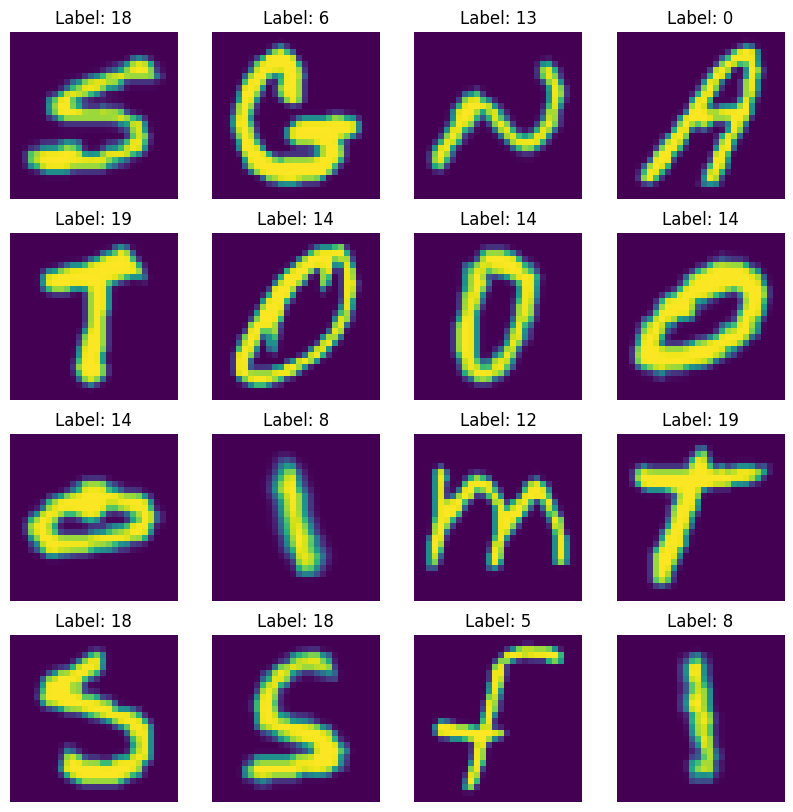

In [42]:
fig = plt.figure(figsize=(10, 10))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_index = torch.randint(0, len(X_train), size=[1]).item()
    face1 = X_train[random_index].to("cpu").reshape(28,28)
    fig.add_subplot(rows, cols, i)
    label = y_train[random_index]
    plt.imshow(face1)
    plt.title("Label: " + str(label.nonzero().item()))
    plt.axis(False);

In [43]:
X_train.unsqueeze(1)[0].shape
# X_val[0].shape

torch.Size([1, 28, 28])

In [44]:
# Convert y_train into a tensor of classes
classes_tensor = torch.argmax(y_train)

classes_tensor, y_train

(tensor(20),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]))

In [45]:
print(X_val.unsqueeze(1).size())
print(y_val.size())
print(y_val_labels.size())

from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train.unsqueeze(1), y_train_labels)
val_dataset = TensorDataset(X_val.unsqueeze(1), y_val_labels)
# from torchvision.transforms import ToTensor
# from torchvision import datasets
# split = 'byclass'

# train_dataset = datasets.EMNIST(
#     root="data",
#     split=split,  # Specify the split here
#     train=True,
#     download=True,
#     transform=ToTensor(),
#     target_transform=None
# )

# val_dataset = datasets.EMNIST(
#     root="data",
#     split=split,  # Specify the split here
#     train=False,
#     download=True,
#     transform=ToTensor()
# )


# class CustomDataset(torch.utils.data.Dataset):
#     def __init__(self, X, y):
#         self.X = X
#         self.y = y

#     def __len__(self):
#         return len(self.X)

#     def __getitem__(self, idx):
#         return self.X[idx], self.y[idx]

# train_dataset = CustomDataset(X_train.unsqueeze(1), y_train)
# val_dataset = CustomDataset(X_val.unsqueeze(1), y_val)
# test_dataset = CustomDataset(X_test, y_test)

torch.Size([37792, 1, 28, 28])
torch.Size([37792, 26])
torch.Size([37792])


In [46]:
# Get the first sample and its label from the dataset
sample, label = train_dataset[0]

# Print the shape of the sample and the label
print("Sample shape:", sample.shape)
print("Label shape:", label.shape)
print(label)

Sample shape: torch.Size([1, 28, 28])
Label shape: torch.Size([])
tensor(20)


In [47]:
BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)
val_dataloader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Długość treningowego dataloadera: {len(train_dataloader)} | wielkość batcha: {BATCH_SIZE}")
print(f"Długość walidacyjnego dataloadera: {len(val_dataloader)} | wielkość batcha: {BATCH_SIZE}")

Długość treningowego dataloadera: 4724 | wielkość batcha: 32
Długość walidacyjnego dataloadera: 1181 | wielkość batcha: 32


In [48]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [49]:
class_names_amount = len(y_train[0])
# print(class_names_amount)
class MNIST_Model(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
      super().__init__()
      self.block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3, 
                    stride=1, 
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                        stride=2)
      )
      self.block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*7*7,
                    out_features=output_shape)
      )

  def forward(self, x):
    return self.classifier(self.block_2(self.block_1(x)))

model = MNIST_Model(1, 10, class_names_amount).to(device)
model

MNIST_Model(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=26, bias=True)
  )
)

In [50]:
# next(iter(val_dataloader)).shape, next(iter(train_dataloader)).shape,X_test.unsqueeze(1).shape

In [51]:
def accuracy_fn(y_true: torch.Tensor, y_pred: torch.Tensor) -> [torch.float]:
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

EPOCHS = 4

In [52]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  train_loss, train_acc = 0, 0
  model.train()
  model.to(device)
  for batch, (X,y) in enumerate(dataloader):
    #print(X.shape)
    X, y= X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [53]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.float().to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)
      )

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [54]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          val_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          accuracy_fn,
          epochs: int,
          device:torch.device = device):

  from timeit import default_timer as timer
  from tqdm.auto import tqdm
  train_time_start = timer()

  for epoch in tqdm(range(epochs)):
    if epoch % 200:
      print(f"Epochs: {epoch}\n-----------------------")

    train_step(model=model,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    test_step(model=model,
              dataloader=val_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

  train_time_end = timer()
  print(f"{(train_time_end - train_time_start):.3f}")

In [55]:
train(model=model,
      train_dataloader=train_dataloader,
      val_dataloader=val_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      epochs=EPOCHS)

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 0.28283 | Train accuracy: 92.15%
Test loss: 0.16210 | Test accuracy: 95.63%

Epochs: 1
-----------------------
Train loss: 0.14650 | Train accuracy: 96.03%
Test loss: 0.15351 | Test accuracy: 95.95%

Epochs: 2
-----------------------
Train loss: 0.12573 | Train accuracy: 96.62%
Test loss: 0.13400 | Test accuracy: 96.44%

Epochs: 3
-----------------------
Train loss: 0.11385 | Train accuracy: 96.89%
Test loss: 0.12421 | Test accuracy: 96.70%

60.974
